<a href="https://colab.research.google.com/github/Natalia203/challenge_telecom_x_alura/blob/main/analise_de_evas%C3%A3o_de_clientes_telecomX_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import requests
import numpy as np


url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.json_normalize(requests.get(url).json())

response = requests.get(url)

In [3]:
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [4]:
print(df.dtypes)

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object


In [5]:
import numpy as np

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.json_normalize(requests.get(url).json())

df.columns = df.columns.str.replace(r'\W+', '_', regex=True).str.lower()

df.drop_duplicates(inplace=True)

df['account_charges_total'] = pd.to_numeric(df['account_charges_total'], errors='coerce')

df.replace(" ", np.nan, inplace=True)
df.fillna({
    'account_charges_total': df['account_charges_total'].median(),
    'account_contract': df['account_contract'].mode()[0],
    'account_paymentmethod': df['account_paymentmethod'].mode()[0],
}, inplace=True)

map_binario = {"Sim": 1, "Não": 0, "Yes": 1, "No": 0}

colunas_binarias = [
    'churn', 'customer_partner', 'customer_dependents',
    'phone_phoneservice', 'phone_multiplelines',
    'internet_onlinesecurity', 'internet_onlinebackup',
    'internet_deviceprotection', 'internet_techsupport',
    'internet_streamingtv', 'internet_streamingmovies',
    'account_paperlessbilling'
]

for col in colunas_binarias:
    df[col] = df[col].map(map_binario)

renomear_colunas = {
    'customerid': 'id_cliente',
    'customer_gender': 'genero',
    'customer_seniorcitizen': 'idoso',
    'customer_partner': 'tem_conjuge',
    'customer_dependents': 'tem_dependentes',
    'customer_tenure': 'meses_de_contrato',
    'phone_phoneservice': 'tem_telefone',
    'phone_multiplelines': 'multiplas_linhas',
    'internet_internetservice': 'tipo_internet',
    'internet_onlinesecurity': 'seguranca_online',
    'internet_onlinebackup': 'backup_online',
    'internet_deviceprotection': 'protecao_dispositivo',
    'internet_techsupport': 'suporte_tecnico',
    'internet_streamingtv': 'streaming_tv',
    'internet_streamingmovies': 'streaming_filmes',
    'account_contract': 'tipo_contrato',
    'account_paperlessbilling': 'fatura_digital',
    'account_paymentmethod': 'metodo_pagamento',
    'account_charges_monthly': 'cobranca_mensal',
    'account_charges_total': 'cobranca_total',
    'churn': 'evadiu'
}

df.rename(columns=renomear_colunas, inplace=True)

col_categoricas = df.select_dtypes(include='object').columns
for col in col_categoricas:
    df[col] = df[col].str.strip().str.lower()



In [6]:
print(df.dtypes)

id_cliente               object
evadiu                  float64
genero                   object
idoso                     int64
tem_conjuge               int64
tem_dependentes           int64
meses_de_contrato         int64
tem_telefone              int64
multiplas_linhas        float64
tipo_internet            object
seguranca_online        float64
backup_online           float64
protecao_dispositivo    float64
suporte_tecnico         float64
streaming_tv            float64
streaming_filmes        float64
tipo_contrato            object
fatura_digital            int64
metodo_pagamento         object
cobranca_mensal         float64
cobranca_total          float64
dtype: object


In [7]:
df['contas_diarias'] = (df['cobranca_mensal'] / 30).round(2)

In [8]:
df

,id_cliente,evadiu,genero,idoso,tem_conjuge,tem_dependentes,meses_de_contrato,tem_telefone,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,cobranca_mensal,cobranca_total,contas_diarias
0,0002-orfbo,0.0,female,0,1,1,9,1,0.0,dsl,...,0.0,1.0,1.0,0.0,one year,1,mailed check,65.60,593.30,2.19
1,0003-mknfe,0.0,male,0,0,0,9,1,1.0,dsl,...,0.0,0.0,0.0,1.0,month-to-month,0,mailed check,59.90,542.40,2.00
2,0004-tlhlj,1.0,male,0,0,0,4,1,0.0,fiber optic,...,1.0,0.0,0.0,0.0,month-to-month,1,electronic check,73.90,280.85,2.46
3,0011-igkff,1.0,male,1,1,0,13,1,0.0,fiber optic,...,1.0,0.0,1.0,1.0,month-to-month,1,electronic check,98.00,1237.85,3.27
4,0013-exchz,1.0,female,1,1,0,3,1,0.0,fiber optic,...,0.0,1.0,1.0,0.0,month-to-month,1,mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,0.0,female,0,0,0,13,1,0.0,dsl,...,0.0,1.0,0.0,0.0,one year,0,mailed check,55.15,742.90,1.84
7263,9992-rramn,1.0,male,0,1,0,22,1,1.0,fiber optic,...,0.0,0.0,0.0,1.0,month-to-month,1,electronic check,85.10,1873.70,2.84
7264,9992-ujoel,0.0,male,0,0,0,2,1,0.0,dsl,...,0.0,0.0,0.0,0.0,month-to-month,1,mailed check,50.30,92.75,1.68
7265,9993-lhieb,0.0,male,0,1,1,67,1,0.0,dsl,...,1.0,1.0,0.0,1.0,two year,0,mailed check,67.85,4627.65,2.26


In [9]:
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

descricao_numerica = df[colunas_numericas].describe().transpose()
descricao_numerica['mediana'] = df[colunas_numericas].median()

print("Estatísticas Descritivas - Variáveis Numéricas:")
print(descricao_numerica)


Estatísticas Descritivas - Variáveis Numéricas:
                       count         mean          std    min      25%  \
evadiu                7043.0     0.265370     0.441561   0.00    0.000   
idoso                 7267.0     0.162653     0.369074   0.00    0.000   
tem_conjuge           7267.0     0.484106     0.499782   0.00    0.000   
tem_dependentes       7267.0     0.300124     0.458343   0.00    0.000   
meses_de_contrato     7267.0    32.346498    24.571773   0.00    9.000   
tem_telefone          7267.0     0.902711     0.296371   0.00    1.000   
multiplas_linhas      6560.0     0.467226     0.498963   0.00    0.000   
seguranca_online      5686.0     0.365459     0.481601   0.00    0.000   
backup_online         5686.0     0.440380     0.496476   0.00    0.000   
protecao_dispositivo  5686.0     0.438094     0.496196   0.00    0.000   
suporte_tecnico       5686.0     0.370032     0.482855   0.00    0.000   
streaming_tv          5686.0     0.490679     0.499957   0.00   

In [10]:
colunas_categoricas = df.select_dtypes(include='object').columns

for col in colunas_categoricas:
    print(f"\n{col.upper()}")
    print(df[col].value_counts())
    print("\n% Percentual:")
    percentual = (df[col].value_counts(normalize=True) * 100).round(0).astype(int).astype(str) + '%'
    print(percentual)




ID_CLIENTE
id_cliente
9995-hotoh    1
0002-orfbo    1
0003-mknfe    1
9970-qbcda    1
9968-ffvvh    1
             ..
0014-bmaqu    1
0013-smeoe    1
0013-mhzwf    1
0013-exchz    1
0011-igkff    1
Name: count, Length: 7267, dtype: int64

% Percentual:
id_cliente
9995-hotoh    0%
0002-orfbo    0%
0003-mknfe    0%
9970-qbcda    0%
9968-ffvvh    0%
              ..
0014-bmaqu    0%
0013-smeoe    0%
0013-mhzwf    0%
0013-exchz    0%
0011-igkff    0%
Name: proportion, Length: 7267, dtype: object

GENERO
genero
male      3675
female    3592
Name: count, dtype: int64

% Percentual:
genero
male      51%
female    49%
Name: proportion, dtype: object

TIPO_INTERNET
tipo_internet
fiber optic    3198
dsl            2488
no             1581
Name: count, dtype: int64

% Percentual:
tipo_internet
fiber optic    44%
dsl            34%
no             22%
Name: proportion, dtype: object

TIPO_CONTRATO
tipo_contrato
month-to-month    4005
two year          1743
one year          1519
Name: count, dtype

In [11]:
print("\nDistribuição da Evasão (Churn):")
print(df['evadiu'].value_counts())
print((df['evadiu'].value_counts(normalize=True) * 100).round(0).astype(int))


Distribuição da Evasão (Churn):
evadiu
0.0    5174
1.0    1869
Name: count, dtype: int64
evadiu
0.0    73
1.0    27
Name: proportion, dtype: int64


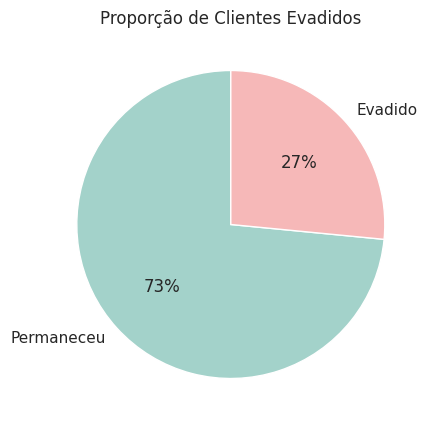

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(5,5))
df['evadiu'].value_counts().plot.pie(
    labels=['Permaneceu', 'Evadido'],
    autopct='%1.0f%%',
    startangle=90,
    colors=['#a3d2ca', '#f6b8b8'],
    wedgeprops=dict(edgecolor='white')
)
plt.title('Proporção de Clientes Evadidos')
plt.ylabel('')
plt.show()


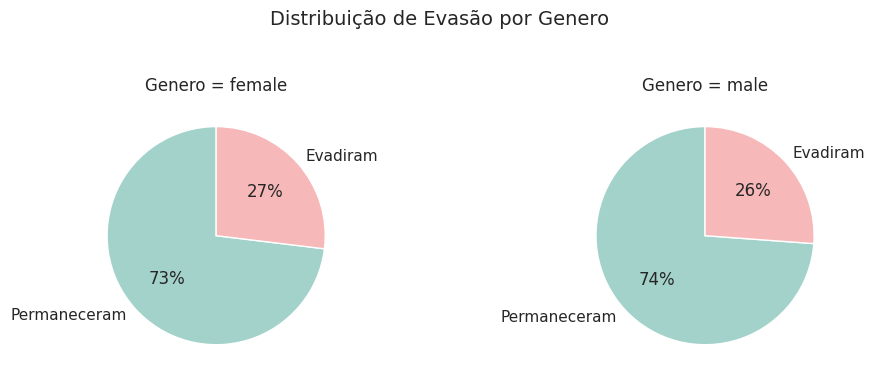

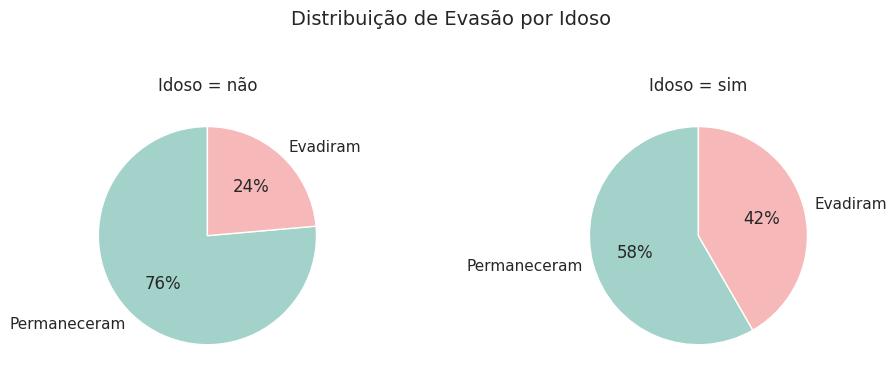

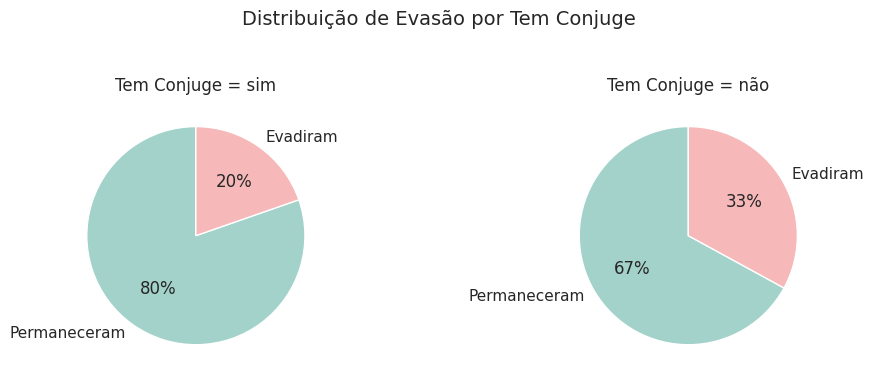

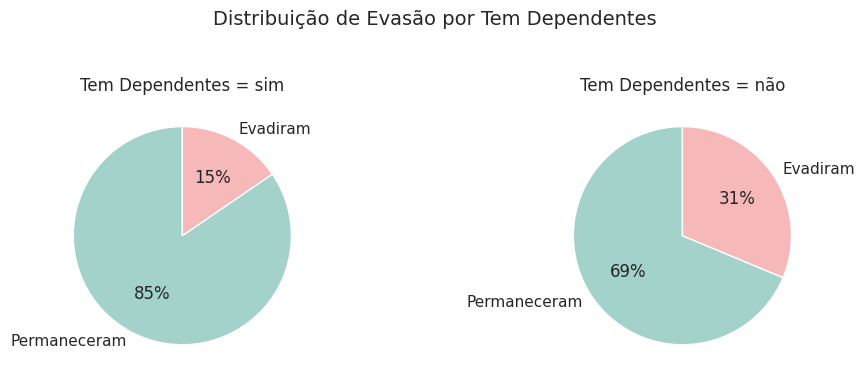

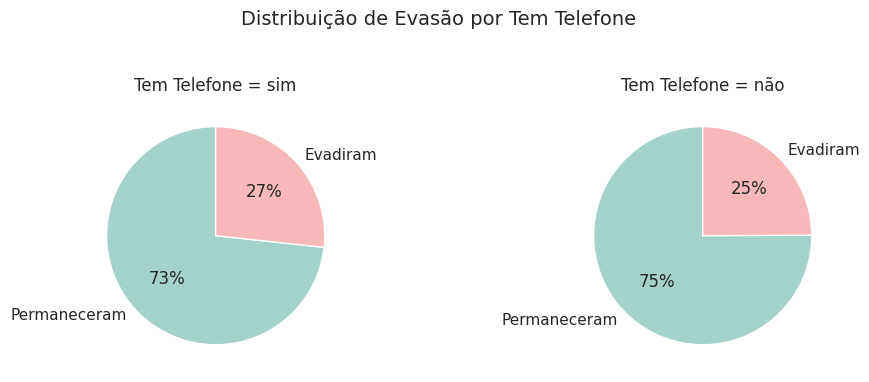

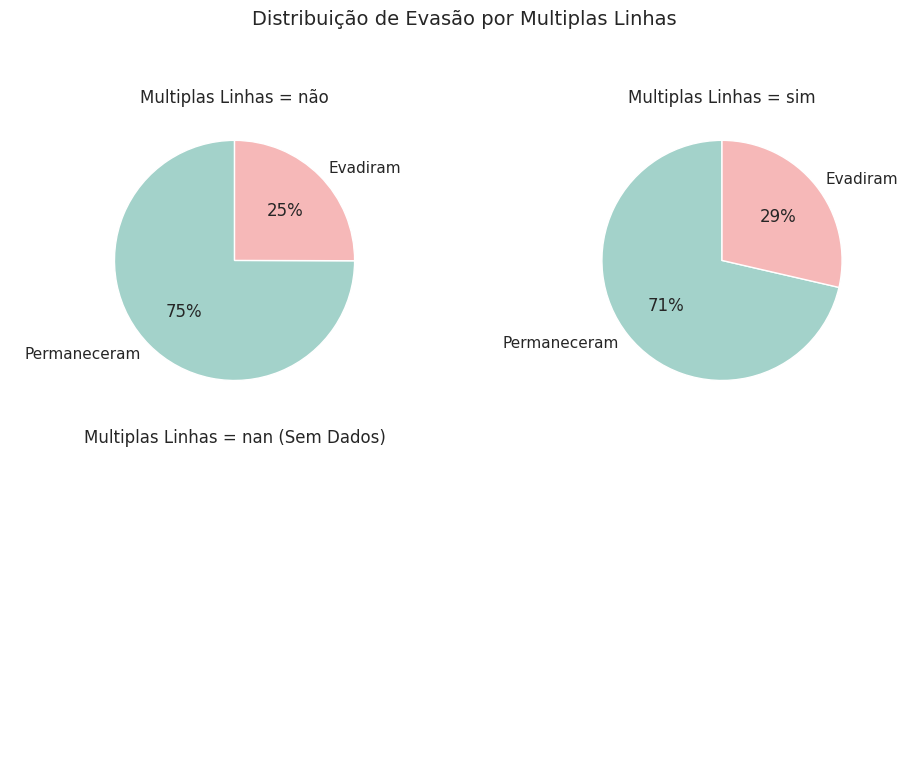

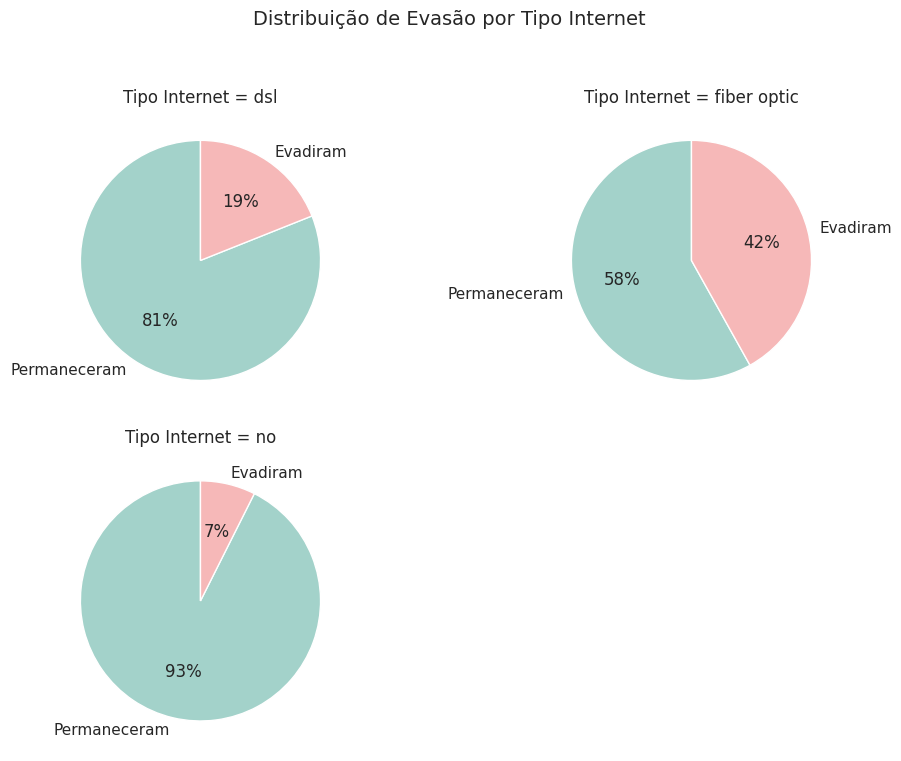

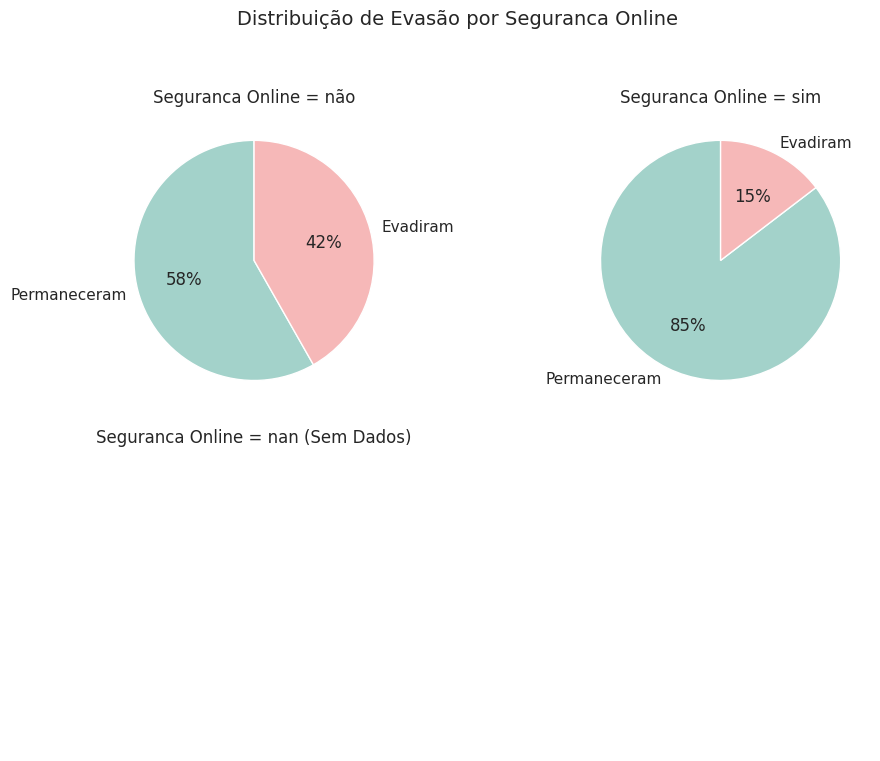

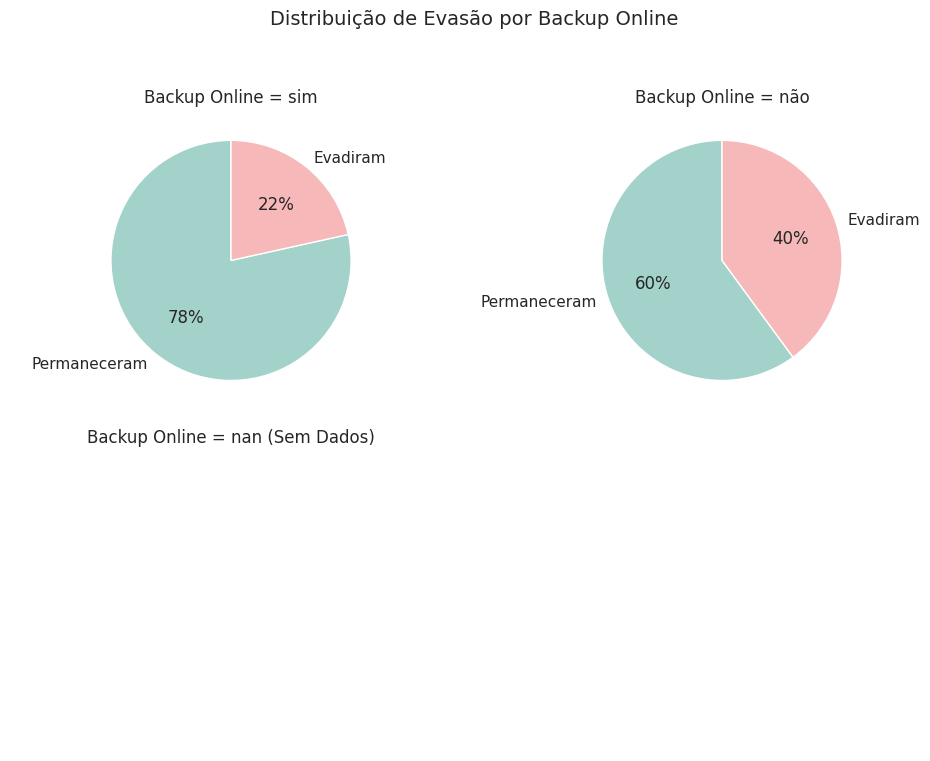

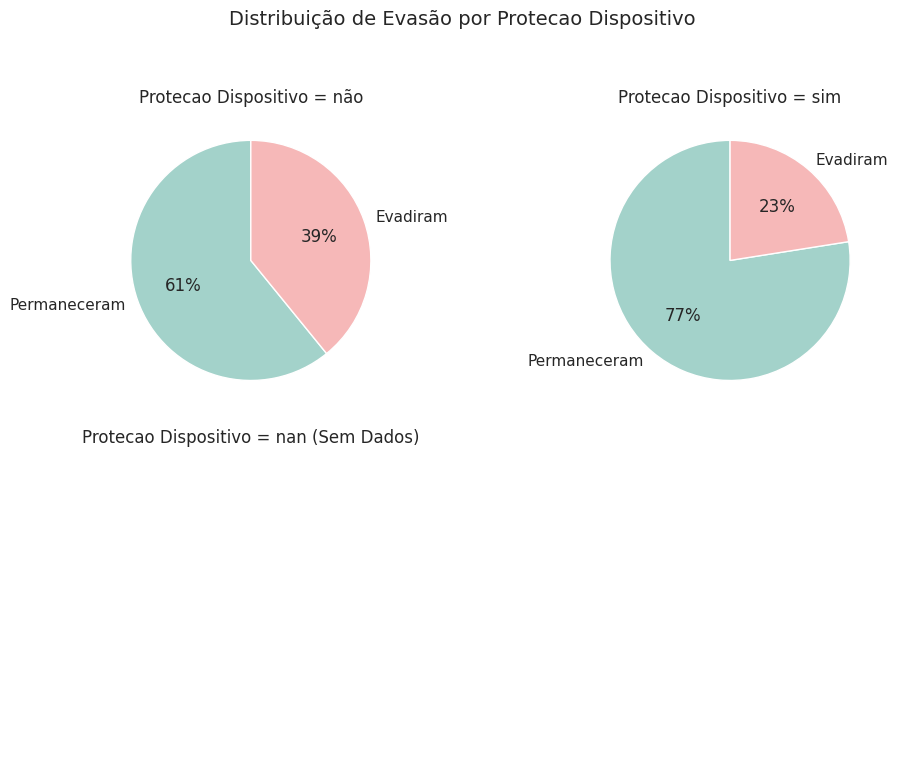

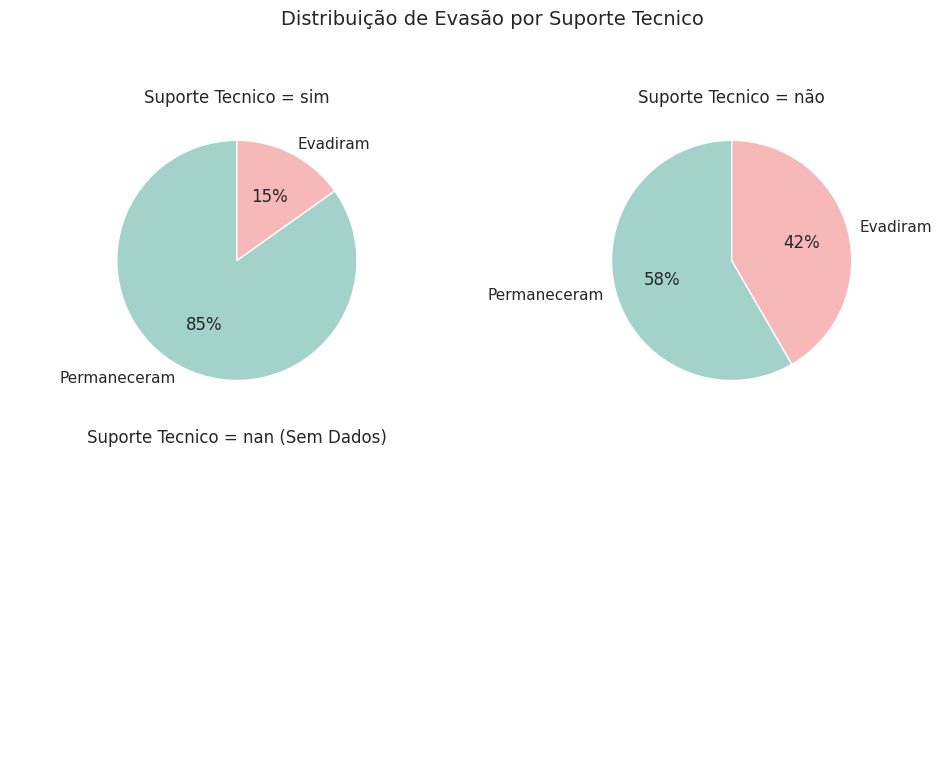

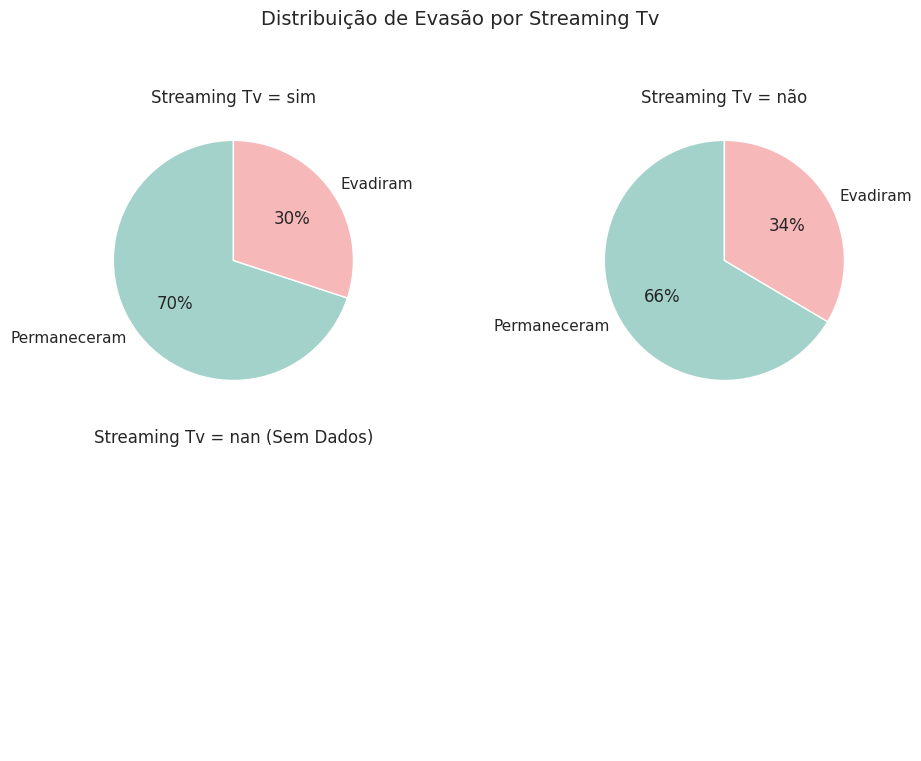

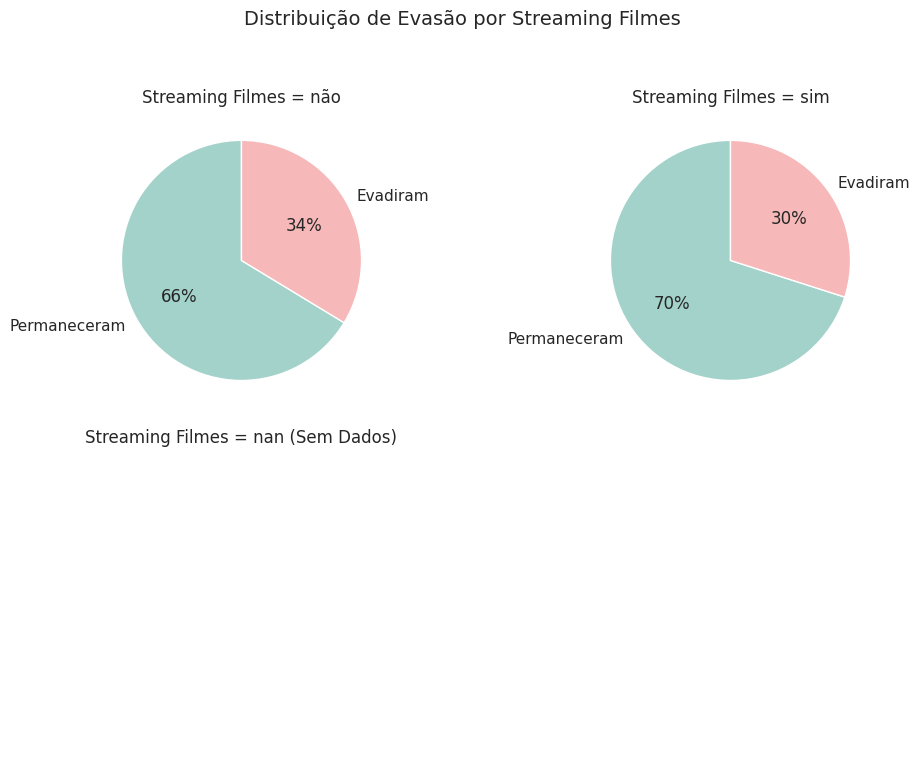

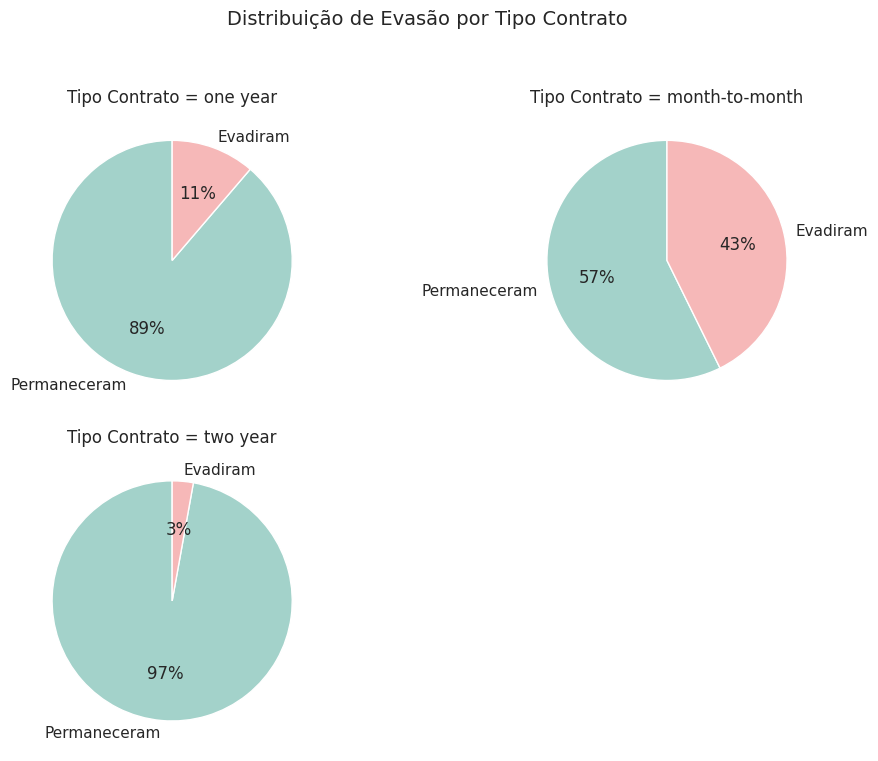

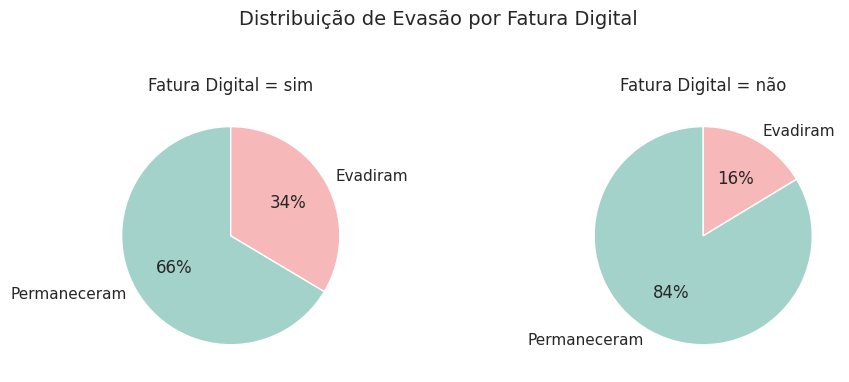

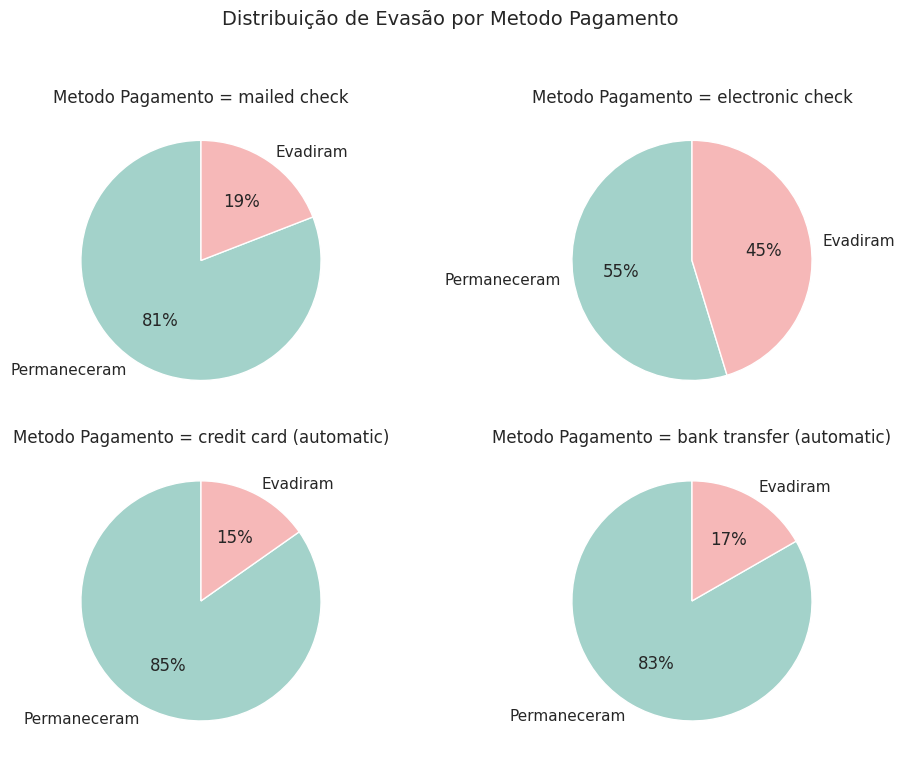

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

variaveis_categoricas = [ 'genero','idoso','tem_conjuge','tem_dependentes',
                          'tem_telefone','multiplas_linhas',
                          'tipo_internet','seguranca_online','backup_online',
                          'protecao_dispositivo','suporte_tecnico','streaming_tv',
                          'streaming_filmes','tipo_contrato','fatura_digital',
                          'metodo_pagamento']

binario_map = {0: 'não', 1: 'sim'}
legendas_pizza = {0: 'Permaneceram', 1: 'Evadiram'}

sns.set(style="whitegrid")

for i, var in enumerate(variaveis_categoricas):
    categorias = df[var].unique()
    num_categorias = len(categorias)
    cols = 2
    rows = (num_categorias + 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows))
    axes = axes.flatten()

    for j, categoria in enumerate(categorias):
        subset = df[df[var] == categoria]
        contagem = subset['evadiu'].value_counts().sort_index()

        categoria_texto = binario_map.get(categoria, categoria)

        if not contagem.empty:
            legenda_mapeada = [legendas_pizza.get(idx, str(idx)) for idx in contagem.index]
            cores = ['#a3d2ca', '#f6b8b8'][:len(contagem)]

            axes[j].pie(contagem, labels=legenda_mapeada, autopct='%1.0f%%', startangle=90,
                        colors=cores, wedgeprops=dict(edgecolor='white'))
            axes[j].set_title(f"{var.replace('_', ' ').title()} = {categoria_texto}")
        else:
            axes[j].set_title(f"{var.replace('_', ' ').title()} = {categoria_texto} (Sem Dados)")
            axes[j].axis('off')

    for k in range(j + 1, len(axes)):
        fig.delaxes(axes[k])

    plt.suptitle(f"Distribuição de Evasão por {var.replace('_', ' ').title()}", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


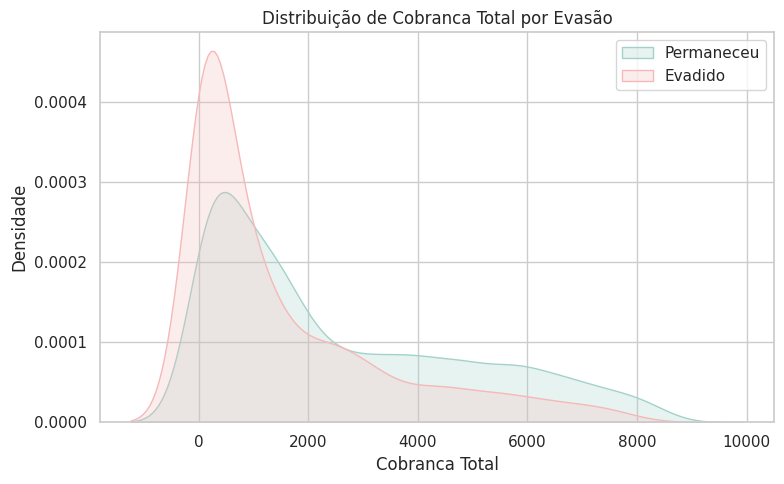

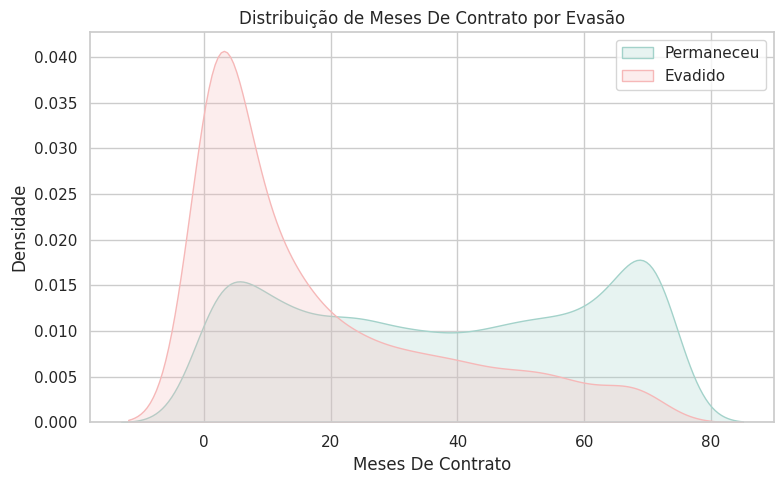

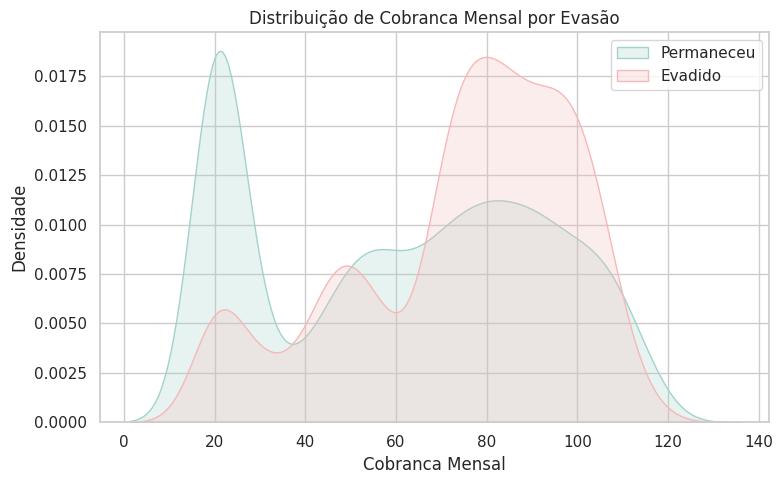

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

variaveis_numericas = ['cobranca_total', 'meses_de_contrato', 'cobranca_mensal']

sns.set(style="whitegrid")

for var in variaveis_numericas:
    plt.figure(figsize=(8, 5))

    sns.kdeplot(data=df[df['evadiu'] == 0], x=var, fill=True, label='Permaneceu', color='#a3d2ca')
    sns.kdeplot(data=df[df['evadiu'] == 1], x=var, fill=True, label='Evadido', color='#f6b8b8')

    plt.title(f'Distribuição de {var.replace("_", " ").title()} por Evasão')
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel('Densidade')
    plt.legend()
    plt.tight_layout()
    plt.show()


Relatório Final — Análise de Evasão de Clientes TelecomX_BR

**Introdução**

O presente trabalho tem como objetivo analisar o fenômeno de evasão de clientes (churn) em uma empresa de telecomunicações. A evasão representa a perda de clientes que cancelam seus serviços, o que impacta diretamente a receita e o crescimento da empresa. Com base em dados históricos de clientes, buscamos identificar os fatores que mais influenciam a decisão de cancelamento.

Essa análise orienta estratégias para retenção de clientes, otimização de serviços e melhorias na comunicação e fidelização.

---

Limpeza e Tratamento de Dados

Os seguintes passos foram realizados na preparação dos dados:

* **Importação dos dados** a partir de um arquivo `json`.
* **Verificação e remoção de valores nulos** ou inconsistentes.
* Conversão de variáveis do tipo string (ex: 'Yes', 'No') para booleanas ou categóricas.
* Conversão de colunas numéricas como `'TotalGasto'` para o tipo `float`.
* Criação de variáveis novas, como faixas de valores para análise das variáveis contínuas.

---

**Análise Exploratória de Dados (EDA)**

Foram realizadas visualizações para entender como a evasão se comporta em diferentes perfis de clientes:

Variáveis Categóricas

* **Gênero**: Evasão praticamente igual entre homens (26%) e mulheres (27%).
* **Idosos**: Taxa de evasão de idosos é **42%**, bem acima dos não idosos (24%).
* **Cônjuge**: Quem tem cônjuge evadiu menos (20%) do que quem não tem (33%).
* **Dependentes**: Clientes com dependentes evadiram apenas 15%, enquanto os sem evadiram 31%.
* **Tipo de Internet**: Clientes com fibra ótica tiveram evasão de 42%, enquanto os com DSL evadiram apenas 19%.
* **Serviços Adicionais**:

  * Segurança online, suporte técnico e proteção de dispositivo reduziram a evasão em até 27 pontos percentuais.
  * Clientes sem esses serviços evadem com mais frequência.

Tipo de Contrato

* Contratos mais longos têm evasão muito menor:

  * **Contrato de 2 anos**: apenas **3%** de evasão.
  * **Contrato mês a mês**: **43%** de evasão.

Forma de Pagamento

* **Electronic Check** tem maior evasão (45%).
* Métodos automáticos (cartão ou transferência) têm evasão bem menor (15-17%).

Variáveis Numéricas (Gráficos de Pizza por Faixa)

* Clientes com **menor tempo de contrato ou menor gasto total** tendem a evadir mais.
* Valores maiores de **cobrança mensal** não necessariamente indicam maior evasão, sugerindo que o tipo de serviço influencia mais que o valor.


---

**Conclusões e Insights**

* A **idade**, **presença de cônjuge e dependentes**, e **tipo de contrato** são fatores fortemente associados à evasão.
* Clientes que **não contratam serviços adicionais** (como backup online, segurança e suporte) evadem mais.
* **Fibra ótica**, embora seja uma tecnologia mais moderna, tem mais evasão — o que pode indicar problemas de qualidade, suporte ou preço.
* Métodos de pagamento manuais (como boleto eletrônico) estão associados à maior evasão.
* **Contratos de longo prazo são uma das maiores proteções contra evasão**.

---

**Recomendações**

Com base na análise, sugerem-se as seguintes ações:

* **Incentivar contratos de longo prazo** com benefícios ou descontos.
* **Oferecer pacotes com serviços adicionais** (como segurança online e suporte técnico) como padrão.
* Realizar **ações de retenção direcionadas a idosos**, usuários com fibra ótica e sem cônjuge ou dependentes.
* Investir na **migração de pagamentos manuais para automáticos**, oferecendo facilidades para o cliente.
* Analisar **a fundo os motivos de evasão nos planos de fibra ótica**, pois embora tecnologicamente superior, mostra alta evasão.
